In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = torch.linspace(0,10, 1000)
Y = 3.14*X + 2.72

X_train, Y_train, X_test, Y_test = X[:800], Y[:800], X[800:], Y[800:]

In [10]:
class lin_mod(nn.Module):
  def __init__(self):
    super().__init__()
    self.w = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
    self.b = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
 
  def forward(self, X: torch.tensor):
    return self.w*X + self.b

In [18]:
torch.manual_seed(32)
mod0 = lin_mod()

In [19]:
loss_fn   = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params= mod0.parameters(), lr = 0.01)

In [20]:
loss_train = []
loss_test  = []
num_epoch  = []
weights    = []
biases     = []


num_epochs = 350
for epoch in range(num_epochs):
    mod0.train()
    y_pred = mod0(X_train)
    train_loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()


    mod0.eval()
    with torch.inference_mode():
        y_pred = mod0(X_test)
        if (epoch%2 == 0):
          loss_t = loss_fn(y_pred, Y_test)#.type(torch.float))
          loss_test.append(loss_t.detach().numpy())
          loss_train.append(train_loss.detach().numpy())
          num_epoch.append(epoch)
          weights.append(mod0.state_dict()['w'].item())
          biases.append(mod0.state_dict()['b'].item())


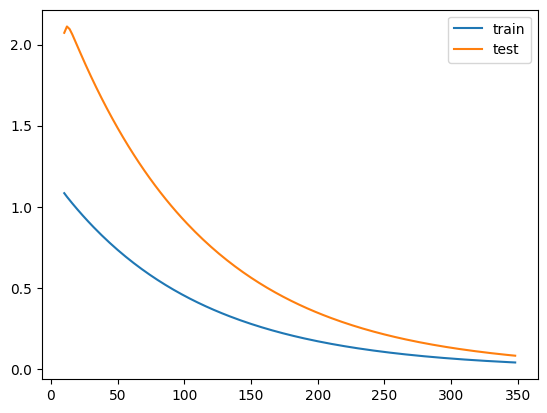

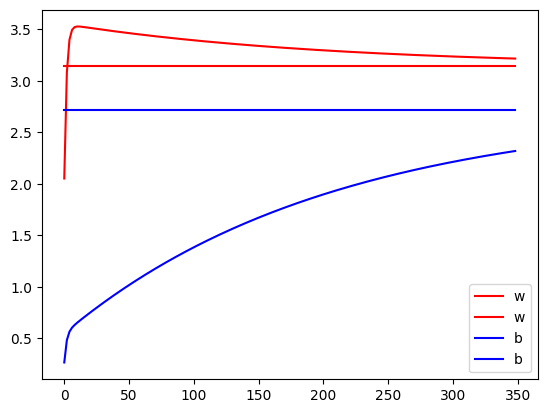

In [21]:
fig, ax = plt.subplots()
ax.plot(num_epoch[5:], loss_train[5:], label= 'train')
ax.plot(num_epoch[5:], loss_test[5:], label= 'test')
ax.legend()

fig, ax = plt.subplots()
ax.plot(num_epoch, weights, label= 'w', color = 'r')
ax.plot(num_epoch, 3.14*np.ones(len(num_epoch)), label= 'w', color = 'r')

ax.plot(num_epoch, biases, label= 'b', color = 'b')
ax.plot(num_epoch, 2.72**np.ones(len(num_epoch)), label= 'b', color = 'b')


ax.legend()


In [ ]:
###### start again

In [2]:
X = torch.linspace(0, 10, 1000)
Y = 3.14*X + 2.72

In [3]:
class linear_model(nn.Module):
  def __init__(self):
      super().__init__()
      self.w = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)
      self.b = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)

  def forward(self, X: torch.tensor):
    return X*self.w + self.b

In [4]:
torch.manual_seed(9)
mod_lin = linear_model()

In [5]:
X_train, Y_train, X_test, Y_test = X[:800], Y[0:800], X[800:], Y[800:]

In [42]:
lr = 0.01
optimizer = torch.optim.SGD(params= mod_lin.parameters(), lr = lr)
loss_fn   = nn.MSELoss()

In [43]:
num_epoch = []
loss_train = []
loss_test = []

n_epochs = 350

for epoch in range(n_epochs):
    mod_lin.train()
    y_pred = mod_lin(X_train)
    loss_t = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss_t.backward()
    optimizer.step()

    mod_lin.eval()
    with torch.inference_mode():
      y_pred = mod_lin(X_test)
      num_epoch.append(epoch)
      loss_train.append(loss_t.detach().numpy())
      loss_tmp = loss_fn(y_pred, Y_test)
      loss_test.append(loss_tmp.detach().numpy())


      if (epoch % 2 == 0):
        print('epoch:' + str(epoch) + ', MSE train:' + str(loss_train[epoch]) + ', MSE test:' + str(loss_test[epoch]) + '  ')




epoch:0, MSE train:7.836906, MSE test:0.24047302  
epoch:2, MSE train:2.7036223, MSE test:1.687681  
epoch:4, MSE train:2.1682143, MSE test:3.319931  
epoch:6, MSE train:2.079652, MSE test:3.8877487  
epoch:8, MSE train:2.03515, MSE test:4.0193586  
epoch:10, MSE train:1.9956131, MSE test:4.0068893  
epoch:12, MSE train:1.9572341, MSE test:3.950009  
epoch:14, MSE train:1.9196318, MSE test:3.8803434  
epoch:16, MSE train:1.8827556, MSE test:3.807704  
epoch:18, MSE train:1.8465872, MSE test:3.7351553  
epoch:20, MSE train:1.8111145, MSE test:3.6635904  
epoch:22, MSE train:1.7763234, MSE test:3.5932648  
epoch:24, MSE train:1.7422004, MSE test:3.5242538  
epoch:26, MSE train:1.7087321, MSE test:3.456556  
epoch:28, MSE train:1.6759077, MSE test:3.3901548  
epoch:30, MSE train:1.6437134, MSE test:3.3250318  
epoch:32, MSE train:1.6121383, MSE test:3.2611578  
epoch:34, MSE train:1.5811685, MSE test:3.198518  
epoch:36, MSE train:1.5507942, MSE test:3.137077  
epoch:38, MSE train:1.52100

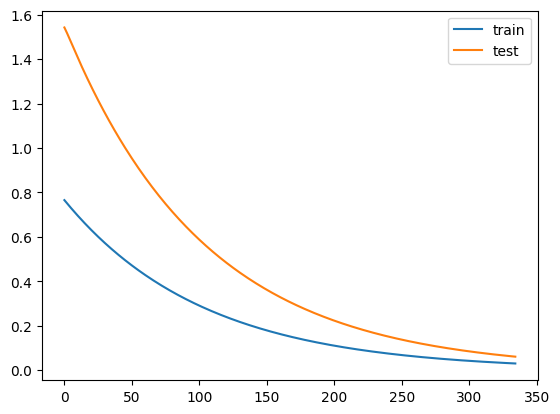

In [8]:
fig, ax = plt.subplots()
ax.plot(loss_train[15:], label= 'train')
ax.plot(loss_test[15:], label= 'test')

ax.legend()

In [9]:
# third time

In [31]:
X = torch.linspace(0,10,1000)
Y = 3.14*X  + 5.4321

In [32]:
X_train, Y_train, X_test, Y_test = X[:800], Y[:800], X[800:], Y[800:]

In [33]:
class linear_model3(nn.Module):
  def __init__(self):
    super().__init__()
    self.w = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
    self.b = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

  def forward(self, X: torch.tensor)-> torch.tensor:
    return X*self.w + self.b  


In [44]:
torch.manual_seed(45)
cl3 = linear_model3()

In [45]:
optimizer = torch.optim.SGD(params = cl3.parameters() ,lr =0.01)
loss_fn   = nn.MSELoss()

In [46]:
num_epochs = 300

loss_train = []
loss_test  = []
num_epoch  = []


for epoch in range(num_epochs):
    cl3.train()
    Y_pred= cl3(X_train)
    loss  = loss_fn(Y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
                     
    cl3.eval()
    with torch.inference_mode():
      if ((epoch % 5) == 0):
        Y_pred_test  = cl3(X_test)
        loss_test_t  = loss_fn(Y_pred_test, Y_test)
        loss_train.append(loss.detach().item())
        loss_test.append(loss_test_t.detach().item())
        num_epoch.append(num_epoch)


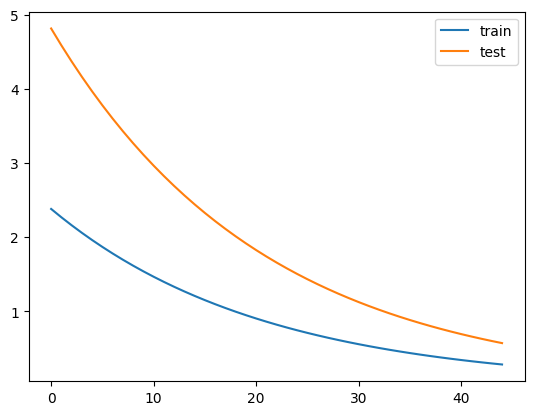

In [48]:
fig, ax = plt.subplots()
ax.plot(loss_train[15:], label= 'train')
ax.plot(loss_test[15:], label= 'test')

ax.legend()